# AMAZON FOREST FIRES

## Goal : 
Forest fire in Brazil is a serious problem in preservation of forests. This dataset would help us to analyze the trend of forest fires in Brazil over the years. One of the major reason claimed for forest fires over the years is its weather. Let's analyze the data set find out.

#### The data has been taken from official website of Brazil. The dataset contains the number of fires year and state wise (http://dados.gov.br/dataset/sistema-nacional-de-informacoes-florestais-snif/resource/949310f1-05bc-4f56-a63f-aef67aac6164)

In [163]:
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

In [139]:
df=pd.read_csv('amazon.csv', encoding='latin1')
df.describe()

,year,number
count,6454.000000,6454.000000
mean,2007.461729,108.293163
std,5.746654,190.812242
min,1998.000000,0.000000
25%,2002.000000,3.000000
50%,2007.000000,24.000000
75%,2012.000000,113.000000
max,2017.000000,998.000000


In [140]:
df.tail()

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


#####  • As we look at the statistical overview of the data there is no missing data for year and number columns. The name of the month is in Portuguese and we like to convert it to English. I'll create a new column "month_name" and save the english names of these months.

In [141]:
lookup = {'Janeiro':'January', 'Fevereiro':'February', 'Março':'March', 'Abril':'April','Maio':'May','Junho':'June','Julho':'July',
          'Agosto':'August','Setembro':'September', 'Outubro':'October', 'Novembro' : 'November', 'Dezembro' : 'December'}
df['month_name'] = df['month'].apply(lambda x: str(lookup[x]))

In [142]:
df.head()

,year,state,month,number,date,month_name
0,1998,Acre,Janeiro,0.0,1998-01-01,January
1,1999,Acre,Janeiro,0.0,1999-01-01,January
2,2000,Acre,Janeiro,0.0,2000-01-01,January
3,2001,Acre,Janeiro,0.0,2001-01-01,January
4,2002,Acre,Janeiro,0.0,2002-01-01,January


In [143]:
df_fires_groupby_year = df.groupby(['year'])[['number']].sum().reset_index()
df_fires_groupby_year.tail()
df_fires_groupby_state = df.groupby(['year','state'])[['number']].sum().reset_index()

## Let's plot a line chart on year basis and try to deduce inferences.

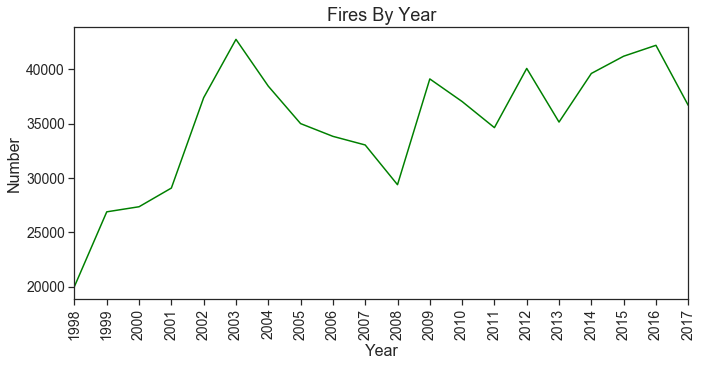

In [178]:
plt.figure(figsize=(11,5))
#plot=sns.barplot(x='year',y='number', data = df_fires_groupby_year.sort_index())
plot=sns.lineplot(x = 'year', y = 'number', data = df_fires_groupby_year, estimator = 'sum', color='green' )
plt.xlabel("Year",fontsize=16)
plt.ylabel("Number",fontsize=16)
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.title("Fires By Year", fontsize=18)
plot.set_xlim(1998, 2017)
plot.xaxis.set_major_locator(plt.MaxNLocator(20))

##### We can clearly make out from the above graph that the number of forest fire has dramatically increased after 2001. Seventy per cent of formerly forested land in the Amazon, and 91% of land deforested since 1970, is used for livestock pasture. The Brazilian government initially attributed 38% of all forest loss between 1966 and 1975 to large-scale cattle ranching.According to the Center for International Forestry Research (CIFOR), "between 1990 and 2001 the percentage of Europe's processed meat imports that came from Brazil rose from 40 to 74 percent" and by 2003 "for the first time ever, the growth in Brazilian cattle production, 80 percent of which was in the Amazon was largely export driven."



##### Let's now check the month wise trend

In [146]:
df_fires_month_wise = df.groupby(['month_name'])[['number']].sum().reset_index()
df_fires_month_wise.head()

,month_name,number
0,April,28188.770
1,August,88050.435
2,December,57535.480
3,February,30848.050
4,January,47747.844


Text(0.5,1,'Fires By Year')

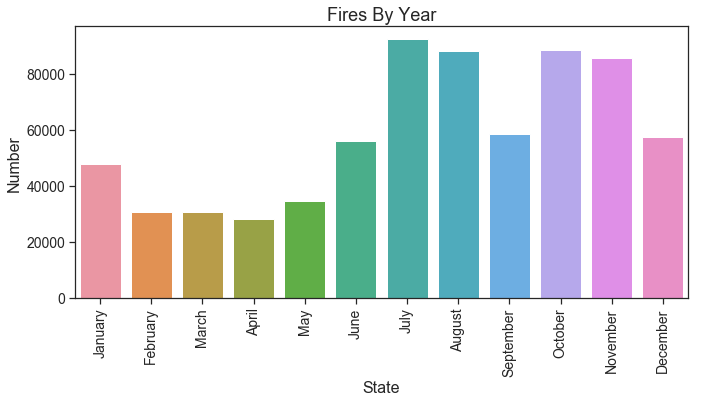

In [175]:
plt.figure(figsize=(11,5))
sns.barplot(x='month_name',y='number', data = df_fires_month_wise,order=['January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September', 'October', 'November', 'December'])
plt.xlabel("State",fontsize=16)
plt.ylabel("Number",fontsize=16)
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.title("Fires By Year", fontsize=18)

##### The graph above clearly depicts that there is an increase number of fires in latter half of the year. This cannot just be a coincidence, this trend is because of the dry season in Brazil is from July to October. 

##### Let's now check the state wise trend

In [152]:
df_fires_groupby_state = df.groupby(['state'])[['number']].sum().reset_index()
sort_fire_state = df_fires_groupby_state.sort_values(['number'])
sort_fire_state.head()

,state,number
21,Sergipe,3237.00
6,Distrito Federal,3561.00
1,Alagoas,4644.00
7,Espirito Santo,6546.00
0,Acre,18464.03


Text(0.5,1,'Fires By Year')

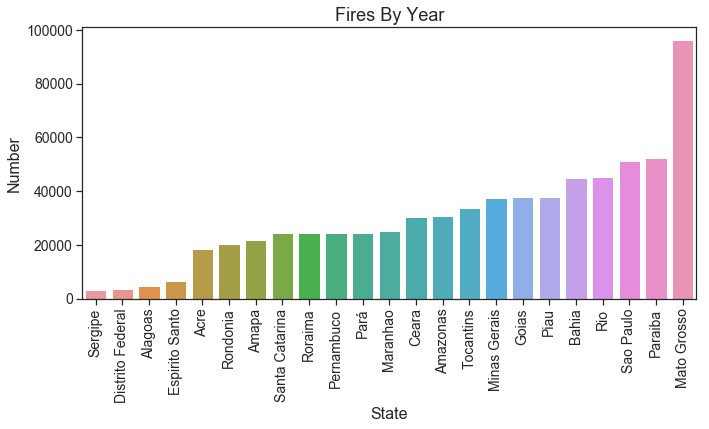

In [174]:
plt.figure(figsize=(11,5))
sns.barplot(x='state',y='number', data = sort_fire_state)
plt.xlabel("State",fontsize=16)
plt.ylabel("Number",fontsize=16)
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.title("Fires By Year", fontsize=18)

##### The above graph shows that the number of fires in Mato Grosso is far more than other states. 

##### The legal Amazon comprises the states of Acre, Amapa, Para, Amazonas, Rondonia, Roraima, and part of Mato Grosso, Tocantins, and Maranhao. So now lets just look at these states only.

In [170]:
df_amazon_states = df.loc[df['state'].isin(['Acre','Amapa','Para','Amazonas','Roraima','Mato Grosso','Tocantins','Maranhao'])].groupby(by = ['year','state'])[['number']].sum().reset_index()
df_amazon_states.head()

,year,state,number
0,1998,Acre,730.000
1,1998,Amapa,278.000
2,1998,Amazonas,946.000
3,1998,Maranhao,365.884
4,1998,Mato Grosso,2401.389


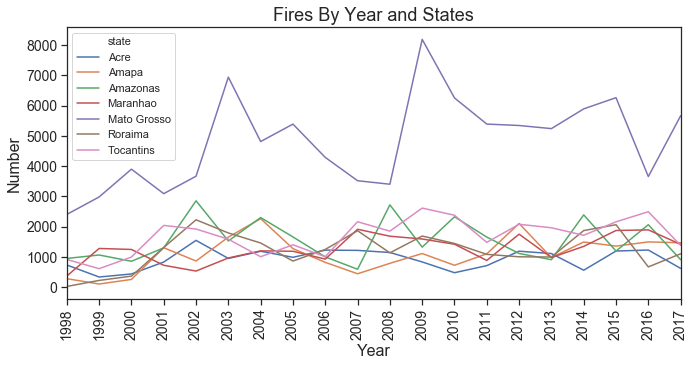

In [173]:
plt.figure(figsize=(11,5))
#plot=sns.barplot(x='year',y='number', data = df_fires_groupby_year.sort_index())
plot=sns.lineplot(x = 'year', y = 'number', data = df_amazon_states, estimator = 'sum', color='red', hue='state' )
plt.xlabel("Year",fontsize=16)
plt.ylabel("Number",fontsize=16)
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.title("Fires By Year and States", fontsize=18)
plot.set_xlim(1998, 2017)
plot.xaxis.set_major_locator(plt.MaxNLocator(20))

##### We can deduce from the above graph that there is not much variation in number fire incidents over the years in most of the states which cover Amazon rain forest, except for Mato Grosso. 

##### Let's look at the line chart for top three states that had fire incidents.

In [156]:
df_amazon_states_top = df.loc[df['state'].isin(['Mato Grosso','Sao Paulo','Paraiba'])].groupby(by = ['year','state'])[['number']].sum().reset_index()
df_amazon_states_top.head()

,year,state,number
0,1998,Mato Grosso,2401.389
1,1998,Paraiba,816.000
2,1998,Sao Paulo,3196.000
3,1999,Mato Grosso,2979.399
4,1999,Paraiba,3437.000


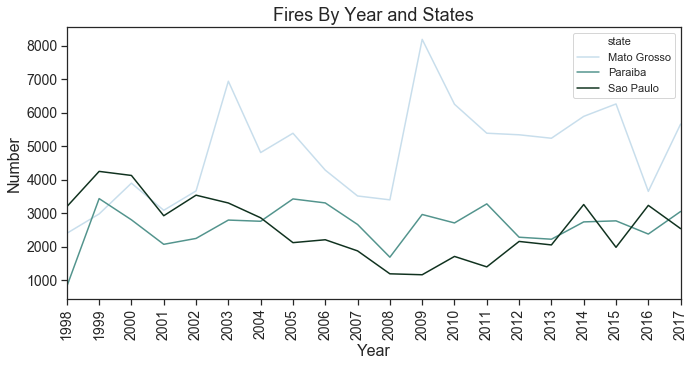

In [177]:
plt.figure(figsize=(11,5))
#plot=sns.barplot(x='year',y='number', data = df_fires_groupby_year.sort_index())
plot=sns.lineplot(x = 'year', y = 'number', data = df_amazon_states_top, estimator = 'sum', color='red', hue='state', palette='ch:5,.25' )
plt.xlabel("Year",fontsize=16)
plt.ylabel("Number",fontsize=16)
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.title("Fires By Year and States", fontsize=18)
plot.set_xlim(1998, 2017)
plot.xaxis.set_major_locator(plt.MaxNLocator(20))